<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%207/XGBoost_melb_data_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rizqy Asyraff Athallah
1103210158

diawali dengan mengupload file, lalu menampilkan beberapa baris data untuk diverifikasi

In [1]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Extract the file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

# Tampilkan beberapa baris data untuk verifikasi
df.head()


Saving melb_data.csv to melb_data.csv


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Menentukan prediktor dan variabel target

In [2]:
# Define predictors and target
predictors = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
target = 'Price'

# Select predictors and target from the DataFrame
X = df[predictors]
y = df[target]


Pisahkan data lalu training dan visualisasi. Serta menginisialisasi dan melatih model XGBoost

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Define the dataset (use your own data in place of 'df' for real-world cases)
X = df[['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = df['Price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Train the model with evaluation set for tracking learning curve
model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Specify evaluation set
    verbose=False  # Suppress output
)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Menampilkan learning curve

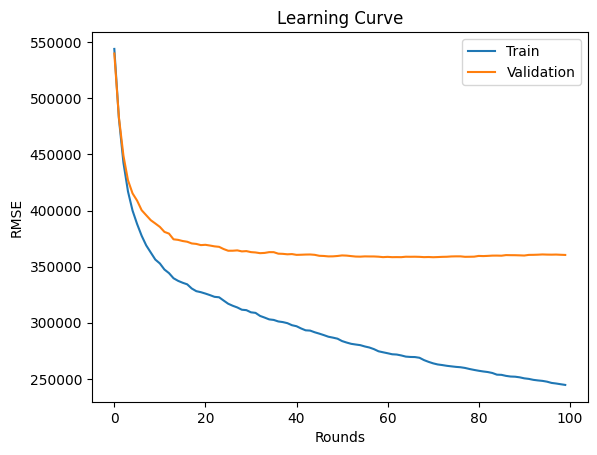

In [6]:
# Retrieve and plot learning curve
results = model.evals_result()

# Plot the RMSE for training and validation sets
import matplotlib.pyplot as plt

plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Validation')
plt.xlabel('Rounds')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


Menampilkan Feature Importance

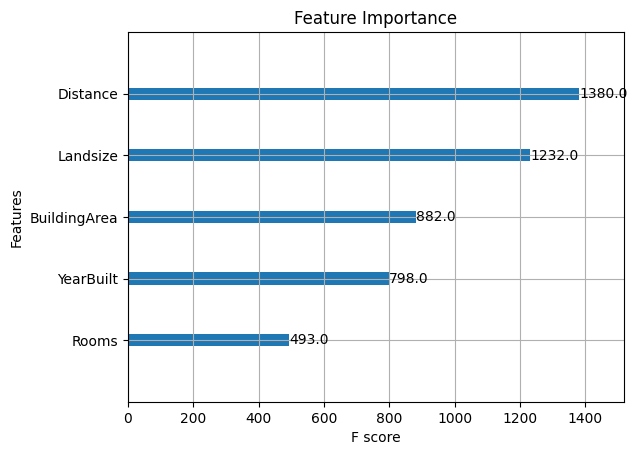

In [13]:
# Visualize feature importance
xgb.plot_importance(model, importance_type='weight', title='Feature Importance')
plt.show()


Menampilkan visualisasi pohon

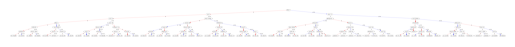

In [14]:
# Visualize one of the trees
xgb.plot_tree(model, num_trees=0)
plt.show()

Menampilkan Shap Values

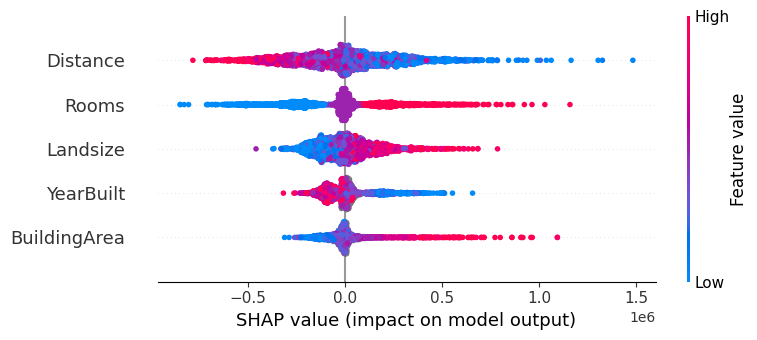

In [9]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for the validation set
shap_values = explainer(X_val)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_val)


Menampilkan Partial Depedence Plot

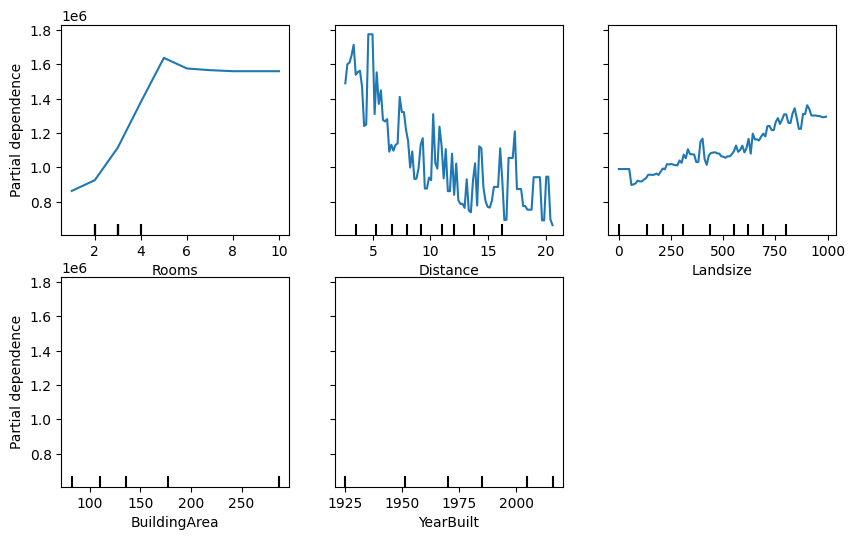

In [12]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plot Partial Dependence Plot
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(model, X_train, features=[0, 1, 2, 3, 4], ax=ax)
plt.show()
